<a href="https://colab.research.google.com/github/mnJ00/Data/blob/main/%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A7%91%EA%B0%92_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

import warnings

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')
train.head()

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       51 non-null     object 
 1   CRIM     51 non-null     float64
 2   ZN       51 non-null     float64
 3   INDUS    51 non-null     float64
 4   CHAS     51 non-null     float64
 5   NOX      51 non-null     float64
 6   RM       51 non-null     float64
 7   AGE      51 non-null     float64
 8   DIS      51 non-null     float64
 9   RAD      51 non-null     float64
 10  TAX      51 non-null     float64
 11  PTRATIO  51 non-null     float64
 12  B        51 non-null     float64
 13  LSTAT    51 non-null     float64
dtypes: float64(13), object(1)
memory usage: 5.7+ KB


In [ ]:
## 검증데이터 만들기
from sklearn.model_selection import train_test_split

train_x = train.drop(columns=['ID', 'MEDV'])
train_x = train_x.astype(int)
train_y = train['MEDV']

In [ ]:
valid_x = test.drop(columns=['ID'])
valid_x = valid_x.astype(int)

test.insert(loc=14, column='MEDV', value=[0] * len(test))

valid_y = test['MEDV']

## 데이터 전처리

In [ ]:
## 데이터 전처리(표준화)StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train_x)
train_scaled = scaler.transform(train_x)
#train_scaler = scaler.fit_transform(train[train.columns[1:-1]])

scaler.fit(valid_x)
valid_scaled = scaler.transform(valid_x)

In [ ]:
## 데이터 전처리 Principal Component Analysis, (1차원)

from sklearn.decomposition import PCA

pca = PCA(n_components=1)

pca.fit(train_scaled)
train_pca = pca.transform(train_scaled)
valid_pca = pca.transform(valid_scaled)

In [ ]:
## LinearRegression 모델 평가

from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(train_pca, train_y)

LinearRegression()

In [ ]:
print(valid_pca.shape)
print(valid_y.shape)

print(train_pca.shape)
print(train_y.shape)

(51, 1)
(51,)
(455, 1)
(455,)


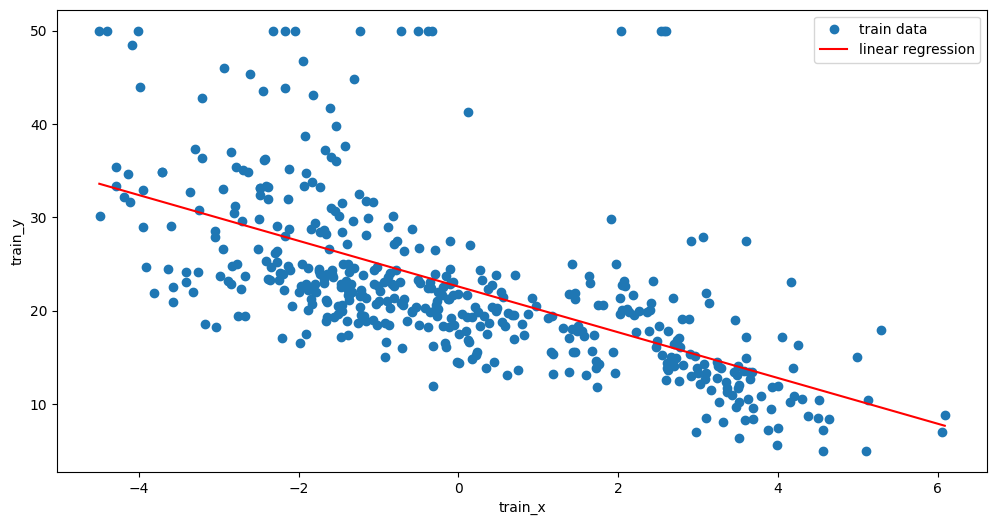

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))

# 학습 데이터 시각화
plt.scatter(train_pca, train_y, label='train data') #1
plt.xlabel('train_x')
plt.ylabel('train_y')

# 모델의 학습 현황 시각화
x_sorted = train_pca.tolist() #2
x_sorted.sort() #3
pred_lr = model_lr.predict(x_sorted) #4
plt.plot(x_sorted, pred_lr, color='red', label='linear regression') #5

plt.legend()
plt.show()

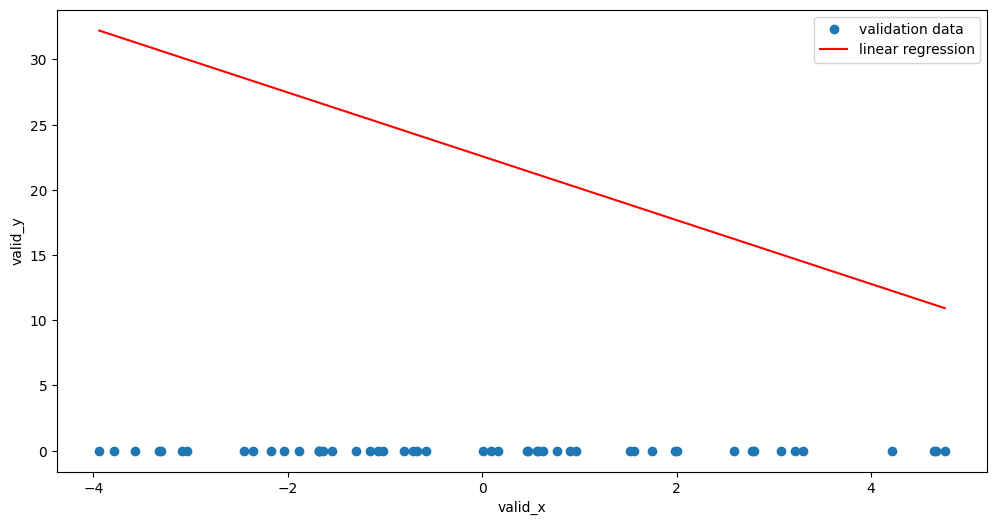

In [ ]:
plt.figure(figsize = (12,6))

plt.scatter(valid_pca, valid_y, label='validation data')
plt.xlabel('valid_x')
plt.ylabel('valid_y')

x_sorted = valid_pca.tolist()
x_sorted.sort()
pred_lr = model_lr.predict(x_sorted)
plt.plot(x_sorted, pred_lr, color='red', label='linear regression')

plt.legend()
plt.show()

## 모델링 **기초**

In [ ]:
## 회귀분석을 위한 formula 작성

formula = """
MEDV ~ scale(CRIM) + scale(ZN) + scale(INDUS) + scale(NOX) + scale(RM) + scale(AGE) + scale(DIS) + scale(RAD) + scale(TAX) + scale(PTRATIO) + scale(B) + scale(LSTAT)
"""

In [ ]:
import statsmodels.api as sm

from sklearn.decomposition import PCA

pca = PCA(n_components=1)

pca.fit(train_scaled)
train_pca = pca.transform(train_scaled)
valid_pca = pca.transform(valid_scaled)


model = sm.OLS.from_formula(formula, data=train_pca)
result = model.fit()
result.summary()



## test 데이터 준비

In [ ]:
import pandas as pd

raw_data_train = pd.read_csv('train.csv')
raw_data_test = pd.read_csv('test.csv')
raw_data_submission = pd.read_csv('sample_submission.csv')

train = raw_data_train.copy()
test = raw_data_test.copy()
submission = raw_data_submission.copy()

In [ ]:
## . 종속변수/독립변수 분리

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
train_x = train[columns]
train_y = train['MEDV']

In [ ]:
## train_test_split()함수를 이용해 train, validateion데이터를 분리

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
train_x = train[columns]
train_y = train['MEDV']

from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

print('데이터 길이: ', len(val_x), len(val_y), len(train_x), len(train_y))

데이터 길이:  91 91 364 364


In [ ]:
train_x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
24,22.05110,0.000000,18.10,0.0,0.740,5.818,92.4,1.8662,24.0,666.0,20.2,391.450000,22.11
17,0.16760,0.000000,7.38,0.0,0.493,6.426,52.3,4.5404,5.0,287.0,19.6,396.900000,7.20
66,0.02055,11.165934,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.900000,5.77
304,5.58107,0.000000,18.10,0.0,0.713,6.436,87.9,2.3158,24.0,666.0,20.2,356.285714,16.22
253,0.09178,0.000000,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.500000,9.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.38799,0.000000,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,356.285714,27.71
270,0.55778,0.000000,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.670000,16.96
348,0.10328,25.000000,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.900000,9.22
435,11.10810,0.000000,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.900000,34.77


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       455 non-null    object 
 1   CRIM     455 non-null    float64
 2   ZN       455 non-null    float64
 3   INDUS    455 non-null    float64
 4   CHAS     455 non-null    float64
 5   NOX      455 non-null    float64
 6   RM       455 non-null    float64
 7   AGE      455 non-null    float64
 8   DIS      455 non-null    float64
 9   RAD      455 non-null    float64
 10  TAX      455 non-null    float64
 11  PTRATIO  455 non-null    float64
 12  B        455 non-null    float64
 13  LSTAT    455 non-null    float64
 14  MEDV     455 non-null    float64
dtypes: float64(14), object(1)
memory usage: 53.4+ KB


## OLS 모델 **학습**

In [ ]:
import statsmodels.api as sm

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
train_x = train[columns]
train_y = train['MEDV']

x_train, val_x, y_train_y, val_y = train_test_split(train_x, train_y, test_size=0.1, random_state=42)


formula = """
MEDV ~ scale(CRIM) + scale(ZN) + scale(INDUS) + scale(NOX) + scale(RM) + scale(AGE) + scale(DIS) + scale(RAD) + scale(TAX) + scale(PTRATIO) + scale(B) + scale(LSTAT)
"""
model = sm.OLS.from_formula(formula, data = x_train)
result = model.fit()

print(result.summary())

PatsyError: Error evaluating factor: NameError: name 'MEDV' is not defined
    MEDV ~ scale(CRIM) + scale(ZN) + scale(INDUS) + scale(NOX) + scale(RM) + scale(AGE) + scale(DIS) + scale(RAD) + scale(TAX) + scale(PTRATIO) + scale(B) + scale(LSTAT)
    ^^^^

In [ ]:
pred = result.predict(val_x)
pred.head()

136    19.485340
137    38.127672
138    14.339946
139    28.408460
140    32.831186
dtype: float64

In [ ]:
pred = result.predict(val_x)
pred.head()
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(val_y, pred)
print('MSE: ', mse)

MSE:  24.90132083972413


## 모델 평가 지표 이해

In [ ]:
## 모델 평가 지표 이해 (1): MAE(평균 절댓값 오차)

def get_mae(y, pred):
    df = pd.DataFrame()
    df['y'] = y
    df['pred'] = pred
    df['absolute_error'] = abs(df['y'] - df['pred'])
    mae = df['absolute_error'].mean()
    return mae

mae = get_mae(val_y, pred)
print(mae)

NameError: name 'pred' is not defined

In [ ]:
## 모델 평가 지표 이해 (2): MSE

def get_mse(y, pred):
    df = pd.DataFrame()
    df['y'] = y
    df['pred'] = pred
    df['absolute_error'] = (df['y'] - df['pred'])**2
    mse = df['absolute_error'].mean()
    return mse

mse = get_mse(val_y, pred)
print(mse)

NameError: name 'pred' is not defined

In [ ]:
## 모델 평가 지표 이해 (3): RMSE

import numpy as np

mse = get_mse(val_y, pred)
rmse = np.sqrt(mse)
print(rmse)

In [ ]:
## Test 데이터에 대한 예측값 얻기
test_pred = result.predict(test)

In [ ]:
## Submission 파일에 예측값 할당하기

submission['MEDV'] = test_pred
submission.head()

In [ ]:
## csv 파일 저장하기
submission.to_csv('submission.csv', index=False)

In [ ]:
## 모델 평가

from sklearn.metrics import r2_score

pred = result.predict(val_x)

print(r2_score(val_y, pred))

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd


# 피처와 타겟 분리

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
train_x = train[columns]
train_y = train['MEDV']

# 표준화 (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_x)

# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_scaled, train_y, test_size=0.1, random_state=51)

# Ridge Regression 모델 생성
alpha = 1.0  # alpha는 정규화 강도를 조절하는 매개변수
ridge_model = Ridge(alpha=alpha)

# 모델 훈련
ridge_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = ridge_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


#
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_test, y_pred)**0.5
print(f'RMSE: {RMSE}')


Mean Squared Error: 14.886982517738254
RMSE: 3.8583652649455384


In [ ]:
2## Ridge Regression 모델 이용 예측
valid_x = test.drop(columns=['ID', 'MEDV'])

prediction = ridge_model.predict(valid_x)

submission = pd.read_csv('submission.csv')
submission['MEDV'] = prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [ ]:
submission

,ID,MEDV
0,TEST_000,-561.374587
1,TEST_001,-1132.299703
2,TEST_002,-1195.918733
3,TEST_003,-586.194006
4,TEST_004,-733.994149
5,TEST_005,-654.092855
6,TEST_006,-645.933324
7,TEST_007,-635.643955
8,TEST_008,-599.118146
9,TEST_009,-738.096283


## Decision Tree 모델 적용->

안함

In [ ]:
## . Decision Tree 모델 평가

from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor()
model_dt.fit(train_pca, train_y)

ValueError: Number of labels=371 does not match number of samples=455

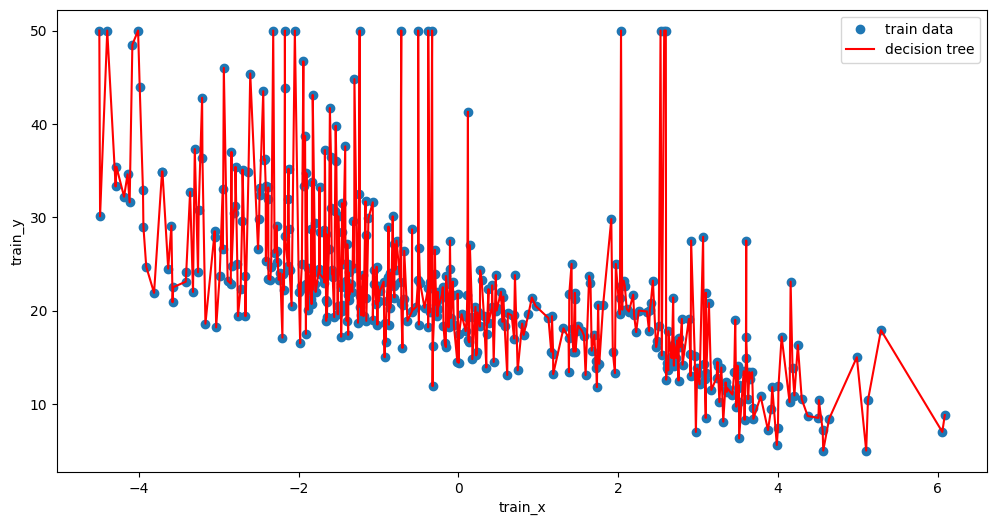

In [ ]:
## train 데이터
plt.figure(figsize = (12,6))

plt.scatter(train_pca, train_y, label='train data')
plt.xlabel('train_x')
plt.ylabel('train_y')

x_sorted = train_pca.tolist()
x_sorted.sort()
pred_dt = model_dt.predict(x_sorted)
plt.plot(x_sorted, pred_dt, color='red', label='decision tree')

plt.legend()
plt.show()

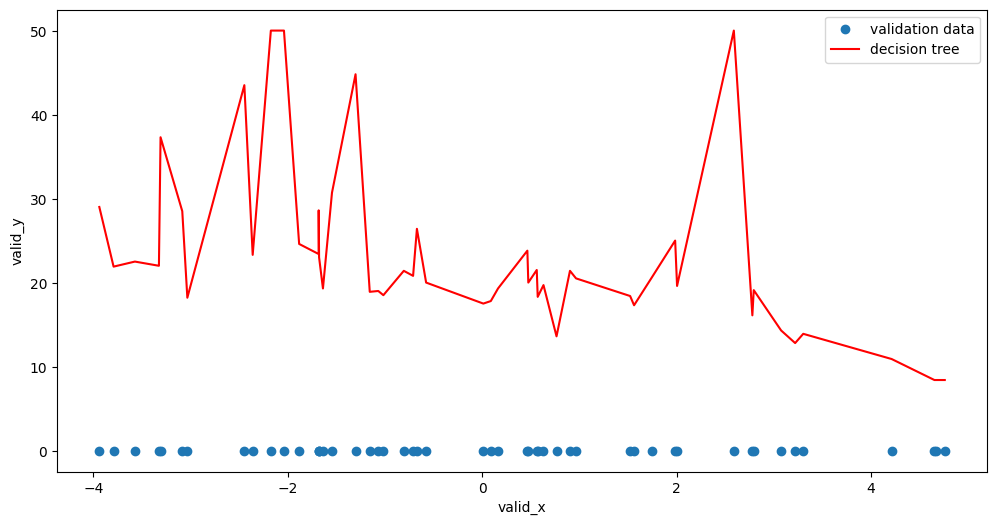

In [ ]:
## 검증데이터
plt.figure(figsize = (12,6))

plt.scatter(valid_pca, valid_y, label='validation data')
plt.xlabel('valid_x')
plt.ylabel('valid_y')

x_sorted = valid_pca.tolist()
x_sorted.sort()
pred_dt = model_dt.predict(x_sorted)
plt.plot(x_sorted, pred_dt, color='red', label='decision tree')

plt.legend()
plt.show()

## 랜덤포레스트 모델 검증

In [ ]:
## 랜덤포레스트 모델

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=777)

In [ ]:
## 하이퍼 파라미터 튜닝: Gird Search Cross Validation
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import GridSearchCV

# 피처와 타겟 분리

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
train_x = train[columns]
train_y = train['MEDV']

# 표준화 (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_x)

# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_scaled, train_y, test_size=0.1, random_state=47)

param_grid = [{
    'n_estimators': [100, 200, 300],
    'max_depth': [8, 10, 13]
    }
]

grid_search = GridSearchCV(
    RandomForestRegressor(),
    param_grid,
    cv=2,
    scoring='neg_root_mean_squared_error'
)

grid_search.fit(X_train, y_train)
print('Done.')

Done.


In [ ]:
## 하이퍼 파라미터 튜닝 결과 확인
result = pd.DataFrame(grid_search.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.197187,0.002306,0.007047,0.000342,8,100,"{'max_depth': 8, 'n_estimators': 100}",-3.262646,-4.103923,-3.683285,0.420639,7
1,0.507300,0.087128,0.015140,0.000153,8,200,"{'max_depth': 8, 'n_estimators': 200}",-3.242837,-4.044557,-3.643697,0.400860,2
2,0.868322,0.058070,0.020197,0.005218,8,300,"{'max_depth': 8, 'n_estimators': 300}",-3.224371,-4.084090,-3.654230,0.429859,4
3,0.200246,0.002220,0.006123,0.000401,10,100,"{'max_depth': 10, 'n_estimators': 100}",-3.228221,-4.034042,-3.631131,0.402911,1
4,0.403211,0.003770,0.010975,0.000079,10,200,"{'max_depth': 10, 'n_estimators': 200}",-3.292997,-4.130421,-3.711709,0.418712,9
5,0.611414,0.002332,0.015926,0.000011,10,300,"{'max_depth': 10, 'n_estimators': 300}",-3.247415,-4.107223,-3.677319,0.429904,6
6,0.207498,0.005487,0.006460,0.000191,13,100,"{'max_depth': 13, 'n_estimators': 100}",-3.227653,-4.175772,-3.701712,0.474059,8
7,0.422134,0.003926,0.011446,0.000078,13,200,"{'max_depth': 13, 'n_estimators': 200}",-3.172450,-4.129033,-3.650741,0.478291,3
8,0.638949,0.005291,0.017614,0.000463,13,300,"{'max_depth': 13, 'n_estimators': 300}",-3.238159,-4.092979,-3.665569,0.427410,5


In [ ]:

best_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=777)
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=777)

In [ ]:
y_pred = best_model.predict(X_test)

# 모델 평가 - MSE 계산
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_test, y_pred)**0.5
print(f'RMSE: {RMSE}')


Mean Squared Error: 5.334813471607416
RMSE: 2.3097215138642615


In [ ]:
## 랜덤포레스트 모델 이용 예측
valid_x = test.drop(columns=['ID'])

prediction = best_model.predict(valid_x)

submission = pd.read_csv('sample_submission.csv')
submission['MEDV'] = prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
submission.to_csv('submission9.csv', index=False)